In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import scipy.spatial.distance as dist
import math

multivariate normal distribution test

homogeneity test of covariance matrix

mean vector homogeneity test

## Pendeklarasian Data

In [2]:
df1 = pd.read_csv("D:\Statistika Multivariat Terapan\engginer.csv") # data engginering

In [3]:
df2 = pd.read_csv("D:\Statistika Multivariat Terapan\Pilot.csv") # data pilot

In [4]:
df1

,x1,x2,x3,x4,x5,x6
0,121,22,74,223,54,254
1,108,30,80,175,40,300
2,122,49,87,266,41,223
3,77,37,66,178,80,209
4,140,35,71,175,38,261
5,108,37,57,241,59,245
6,124,39,52,194,72,242
7,130,34,89,200,85,242
8,149,55,91,198,50,277
9,129,38,72,162,47,268


In [5]:
df2

,y1,y2,y3,y4,y5,y6
0,132,17,77,232,50,249
1,123,32,79,192,64,315
2,129,31,96,250,55,319
3,131,23,67,291,48,310
4,110,24,96,239,42,268
5,47,22,87,231,40,217
6,125,32,87,227,30,324
7,129,29,102,234,58,300
8,130,26,104,256,58,270
9,147,47,82,240,30,322


## Berdasarkan data tersebut

##### a.Ujilah apakah tiap kelompok (Engineer dan Pilots) berdistribusi Normal multivariat
##### b.Apakah kedua kelompok memiliki matriks kovarians yang homogen
##### c.Dengan menganggap kedua kelompok berdistribusi multivariate normal, ujilah apakah ada perbedaan vektor rata-rata kedua kelompok berdasarkan 6 variable tersebut


## Jawaban:


##### a.Ujilah apakah tiap kelompok (Engineer dan Pilots) berdistribusi Normal multivariat

In [6]:
# 1. Hitung vektor rata-rata engginer
mean_vector1 = np.mean(df1, axis=0)
# Konversi ke array NumPy dan ubah ke bentuk kolom
mean_vector_column1 = np.array(mean_vector1.values).reshape(-1, 1)

print(mean_vector_column1)

[[124.5 ]
 [ 38.1 ]
 [ 76.2 ]
 [192.75]
 [ 53.65]
 [250.3 ]]


In [7]:
# 2. Hitung vektor rata-rata pilot
mean_vector2 = np.mean(df2, axis=0)
# Konversi ke array NumPy dan ubah ke bentuk kolom
mean_vector_column2 = np.array(mean_vector2.values).reshape(-1, 1)

print(mean_vector_column2)

[[129.3 ]
 [ 31.7 ]
 [ 87.4 ]
 [236.6 ]
 [ 44.25]
 [280.2 ]]


In [8]:
# 3. Hitung matriks kovarians engginer
cov_matrix1 = np.cov(df1, rowvar=False)
cov_matrix1

array([[ 3.84263158e+02,  2.07368421e+01,  8.13157895e+01,
         2.66052632e+01, -1.59210526e+01,  8.28947368e+01],
       [ 2.07368421e+01,  6.82000000e+01,  9.55789474e+00,
         2.68684211e+01, -6.40684211e+01,  6.70526316e+00],
       [ 8.13157895e+01,  9.55789474e+00,  1.21115789e+02,
        -3.77894737e+01,  2.10526316e-02, -4.06315789e+00],
       [ 2.66052632e+01,  2.68684211e+01, -3.77894737e+01,
         1.00019737e+03, -2.43552632e+01, -8.65789474e+00],
       [-1.59210526e+01, -6.40684211e+01,  2.10526316e-02,
        -2.43552632e+01,  3.22450000e+02, -1.32205263e+02],
       [ 8.28947368e+01,  6.70526316e+00, -4.06315789e+00,
        -8.65789474e+00, -1.32205263e+02,  4.70221053e+02]])

In [9]:
# 4. Hitung matriks kovarians pilot
cov_matrix2 = np.cov(df2, rowvar=False)
cov_matrix2

array([[ 687.8       ,   69.30526316,  -52.17894737,   76.96842105,
          -1.44736842,  439.2       ],
       [  69.30526316,   51.69473684,    3.33684211,  -46.96842105,
         -35.34210526,   56.48421053],
       [ -52.17894737,    3.33684211,  110.88421053,   43.85263158,
          -7.94736842, -111.87368421],
       [  76.96842105,  -46.96842105,   43.85263158,  792.56842105,
           8.15789474,  129.76842105],
       [  -1.44736842,  -35.34210526,   -7.94736842,    8.15789474,
         173.67105263,  116.21052632],
       [ 439.2       ,   56.48421053, -111.87368421,  129.76842105,
         116.21052632, 1253.74736842]])

In [10]:
# 5. Hitung invers matriks kovarians engginer
cov_matrix_inv1 = np.linalg.inv(cov_matrix1)
cov_matrix_inv1

array([[ 3.25301272e-03, -8.23664396e-04, -2.19117903e-03,
        -1.59940216e-04, -2.87381717e-04, -6.64402355e-04],
       [-8.23664396e-04,  1.89928610e-02, -1.04310344e-03,
        -4.18647923e-04,  4.11783448e-03,  1.01539860e-03],
       [-2.19117903e-03, -1.04310344e-03,  9.97090985e-03,
         4.64968533e-04, -8.77880777e-05,  4.71192165e-04],
       [-1.59940216e-04, -4.18647923e-04,  4.64968533e-04,
         1.03368159e-03,  1.17831913e-05,  6.05287521e-05],
       [-2.87381717e-04,  4.11783448e-03, -8.77880777e-05,
         1.17831913e-05,  4.41110774e-03,  1.23160851e-03],
       [-6.64402355e-04,  1.01539860e-03,  4.71192165e-04,
         6.05287521e-05,  1.23160851e-03,  2.58076631e-03]])

In [11]:
# 6. Hitung invers matriks kovarians pilot
cov_matrix_inv2 = np.linalg.inv(cov_matrix2)
cov_matrix_inv2

array([[ 0.0021525 , -0.00275456,  0.00068695, -0.00032337, -0.000147  ,
        -0.00052155],
       [-0.00275456,  0.03325479, -0.00480906,  0.00274605,  0.00770754,
        -0.00196102],
       [ 0.00068695, -0.00480906,  0.01105725, -0.00114646, -0.0012118 ,
         0.00119366],
       [-0.00032337,  0.00274605, -0.00114646,  0.00156751,  0.00065463,
        -0.00033566],
       [-0.000147  ,  0.00770754, -0.0012118 ,  0.00065463,  0.00805421,
        -0.00121818],
       [-0.00052155, -0.00196102,  0.00119366, -0.00033566, -0.00121818,
         0.00132283]])

In [12]:
# 7. Hitung jarak Mahalanobis dan kuadratkan hasilnya dari engginer

mahalanobis_squared1 = [
    dist.mahalanobis(row, mean_vector1, cov_matrix_inv1) ** 2 for row in df1.values
]

# Output hasil
mahalanobis_squared1

[6.032284319124235,
 9.108269551558699,
 10.142945883317912,
 9.553358725609762,
 3.2172943847736954,
 5.081955680498134,
 7.49654485030623,
 4.7139591400890435,
 8.401003211462356,
 1.9547206433028863,
 3.4145588544098477,
 5.016247019797038,
 6.19853219239502,
 3.575784970691606,
 7.352045568224841,
 2.608187011062643,
 4.7644898324591605,
 5.532371726195806,
 6.394961114775297,
 3.4404853199458056]

In [13]:
# 8. Hitung jarak Mahalanobis dan kuadratkan hasilnya dari pilot

mahalanobis_squared2 = [
    dist.mahalanobis(row, mean_vector2, cov_matrix_inv2) ** 2 for row in df2.values
]

# Output hasil
mahalanobis_squared2

[7.171416900403874,
 5.9574507684200695,
 3.177506920112005,
 9.363822591730626,
 2.691632356056945,
 10.691755188520576,
 6.309014218524275,
 4.31812153902612,
 4.4070796688621305,
 6.206864726211265,
 3.3734302105953633,
 2.474039915182391,
 8.028595459018096,
 4.1229083344849515,
 4.948110197672125,
 6.544347030848058,
 3.4350712003365786,
 5.712254209732805,
 5.473201621708707,
 9.593376942553041]

##### Pemberian nilai uji chi-square
Karena p = 6 dan alfa = 0.05, maka nilai ujinya adalah 12.59

In [14]:
# NILAI UJI CHI-SQUARE
# Karena p = 6 dan alfa = 0.05
Nilai_uji = 12.59

In [15]:
# 9. Menghitung jumlah jarak mahalanobis engginer yang lebih dari 12.59
count1 = len([x for x in mahalanobis_squared1 if x > Nilai_uji])

print(f"Jumlah data mahalanobis engginer yang lebih dari {Nilai_uji} sebanyak {count1} data")

Jumlah data mahalanobis engginer yang lebih dari 12.59 sebanyak 0 data


In [16]:
# 10. Menghitung jumlah jarak mahalanobis pilot yang lebih dari 12.59
count2 = len([x for x in mahalanobis_squared2 if x > Nilai_uji])

print(f"Jumlah data mahalanobis pilot yang lebih dari {Nilai_uji} sebanyak {count2} data")

Jumlah data mahalanobis pilot yang lebih dari 12.59 sebanyak 0 data


#### Kesimpulan
##### Ternyata dari jarak mahalanobis data engginer dan pilot didapati keduanya berdistribusi normal multivariat karena semua jarak mahalanobis berada pada kontur 50%

##### b.Apakah kedua kelompok memiliki matriks kovarians yang homogen
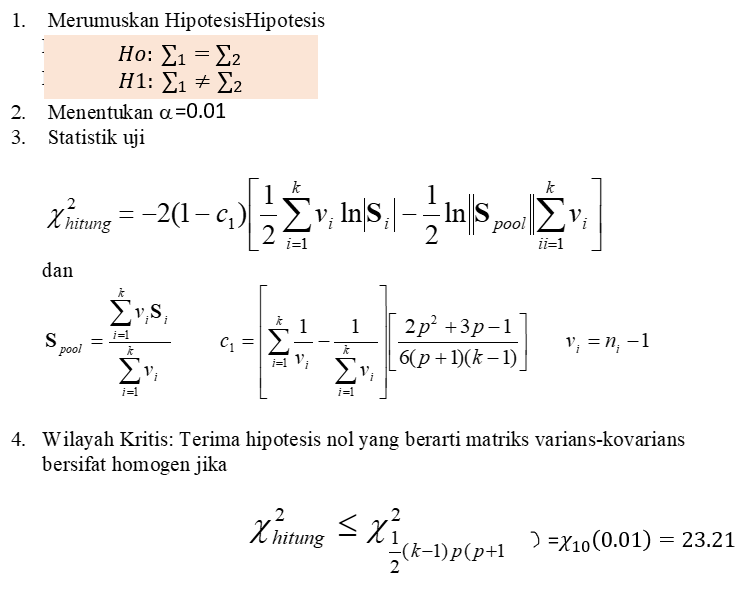

#### Dalam kasus ini kita mempunyai hipotesis berikut:

#### H0 : Matriks kovarians engginer = Matriks kovarians pilot
#### H1 : Matriks kovarians engginer ≠ Matriks kovarians pilot

##### Menghitung c1
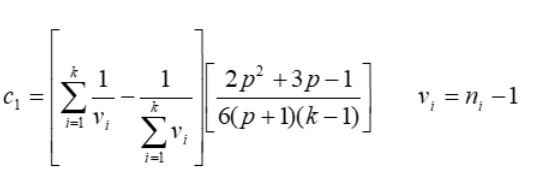

In [17]:
# 1. Melihat banyak baris data engginer
baris = len(df1) 
baris

20

In [18]:
# 2. Menghitung niali c1
def compute_c1_single(n, k, p):
    v = n - 1  # Menghitung v_i
    
    # Menghitung bagian pertama dalam kurung siku pertama
    term_1 = (1 / v) - (1 / (k * v))  
    
    # Menghitung bagian kedua dalam kurung siku kedua
    term_2 = (2 * p**2 + 3 * p - 1) / (6 * (p + 1) * (k - 1))
    
    # Menghitung c1
    c1 = term_1 * term_2
    return c1

# Contoh penggunaan
n = 20  # Nilai n_i tunggal
k = 2   # Contoh jumlah elemen k (harus diberikan)
p = 6   # Contoh nilai p
c1 = compute_c1_single(n, k, p)
print(f"Niali dari c1 adalah {c1}")


Niali dari c1 adalah 0.05576441102756892


##### Menghitung S pool
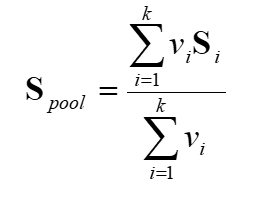

In [19]:
# 3. Menghitung nilai S_pool
S_pool = (19*cov_matrix1 + 19*cov_matrix2)/(2*19)

In [20]:
print("Nilai S_pool adalah")
S_pool

Nilai S_pool adalah


array([[536.03157895,  45.02105263,  14.56842105,  51.78684211,
         -8.68421053, 261.04736842],
       [ 45.02105263,  59.94736842,   6.44736842, -10.05      ,
        -49.70526316,  31.59473684],
       [ 14.56842105,   6.44736842, 116.        ,   3.03157895,
         -3.96315789, -57.96842105],
       [ 51.78684211, -10.05      ,   3.03157895, 896.38289474,
         -8.09868421,  60.55526316],
       [ -8.68421053, -49.70526316,  -3.96315789,  -8.09868421,
        248.06052632,  -7.99736842],
       [261.04736842,  31.59473684, -57.96842105,  60.55526316,
         -7.99736842, 861.98421053]])

##### Menghitung nilai chi-square hitung
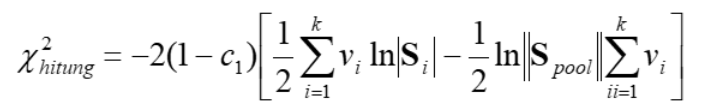

In [21]:
# 4. Menghitung nilai chi-square hitung
det_cov_matrix1 = np.linalg.det(cov_matrix1) # determinan matriks kovarians data engginer
det_cov_matrix2 = np.linalg.det(cov_matrix2) # determinan matriks kovarians data pilot
det_S_pool = np.linalg.det(S_pool) # determinan matriks S_pool

Chi_square_hitung = -2*(1-c1) * (1/2 * (19*math.log(det_cov_matrix1)+19*math.log(det_cov_matrix2)) - 1/2 * math.log(det_S_pool)*(2*19))

In [22]:
print(f"Nilai dari chi-square hitng adalah {Chi_square_hitung}")

Nilai dari chi-square hitng adalah 19.845617347237262


##### Wilayah kritis: Terima hipotesis nol yang berarti matriks varians-kovarians bersifat homogen jika
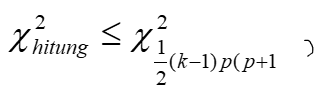

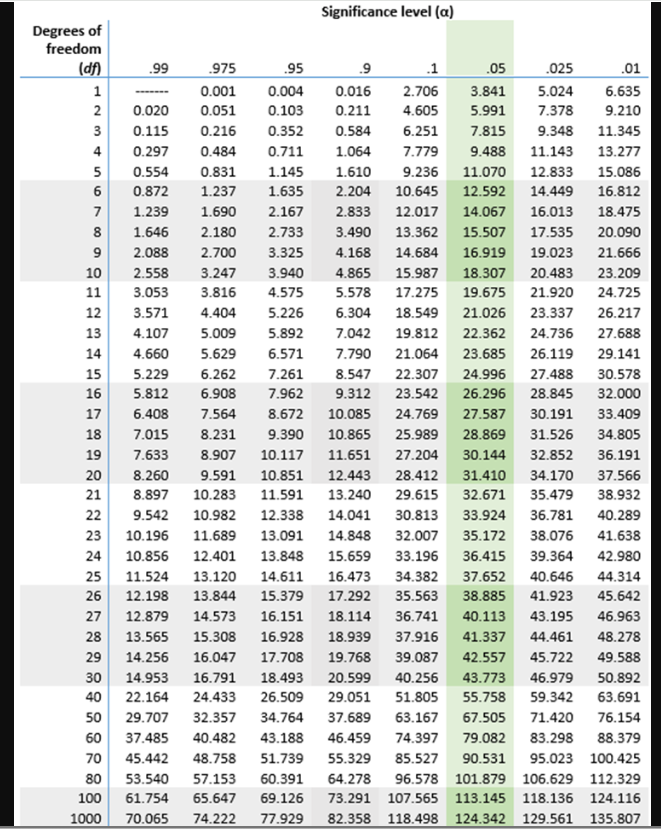

k = 2

p = 6

Maka chi-square hitung ≤ chi-square [1/2 (2-1)6(6+1)] 

chi-square hitung ≤ chi-square(21) 

dan alfa = 0.01


In [23]:
# 5. Melihat nilai chi-square
import scipy.stats as stats

# Input nilai derajat kebebasan (p) dan tingkat signifikansi (alpha)
p = 21      # Gantilah dengan derajat kebebasan yang diinginkan
alpha = 0.01  # Gantilah dengan tingkat signifikansi yang diinginkan

# Menghitung nilai chi-square kritis
chi_square_value = stats.chi2.ppf(1 - alpha, p)

print(f"Nilai Chi-Square untuk p={p} dan alpha={alpha}: {chi_square_value:.4f}")


Nilai Chi-Square untuk p=21 dan alpha=0.01: 38.9322


In [24]:
# 6. Membandingkan nilai chi-square hitung dengan nilai chi-square
if Chi_square_hitung <= chi_square_value:
    print("Terima H0.  Matriks Kovarians kedua populasi sama ")
else:
    print("Tolak H0.  Matriks Kovarians kedua populasi tidak sama ")

Terima H0.  Matriks Kovarians kedua populasi sama 


#### Dari perhitungan diatas, jelas bahwa data engginer dengan data pilot mempunyai  matriks kovarians yang homogen

#### c. Dengan menganggap kedua kelompok berdistribusi multivariate normal, ujilah apakah ada perbedaan vektor rata-rata kedua kelompok berdasarkan 6 variable tersebut


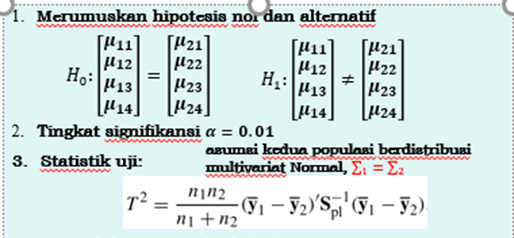
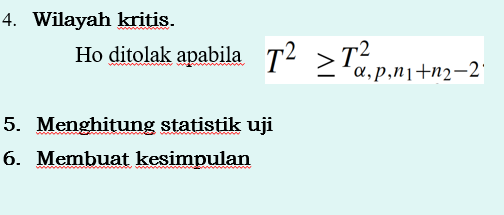

#### Dalam kasus ini kita mempunyai hipotesis berikut ini:
#### H0 : Vektor rata-rata daata engginer = Vektor rata-rata pilot
#### H1 : Vektor rata-rata daata engginer ≠ Vektor rata-rata pilot

In [26]:
'''
Karena diawal kita sudah menghitung vektor rata-rata, matriks kovarians
dari masing-masing data, jadi sekarang kita tinggal mengoperasikannya untuk menghitung T^2
'''

# 1. Menghitung selisih vektor rata-rata keduanya
mean_vector_difference = mean_vector_column1 - mean_vector_column2
mean_vector_difference

array([[ -4.8 ],
       [  6.4 ],
       [-11.2 ],
       [-43.85],
       [  9.4 ],
       [-29.9 ]])

In [27]:
# 2. Menghitung transpose selisih vektor rata-rata keduanya

Transpose_mean_vector_difference= mean_vector_difference.T
Transpose_mean_vector_difference

array([[ -4.8 ,   6.4 , -11.2 , -43.85,   9.4 , -29.9 ]])

#### Berikutnya menghitung T_square

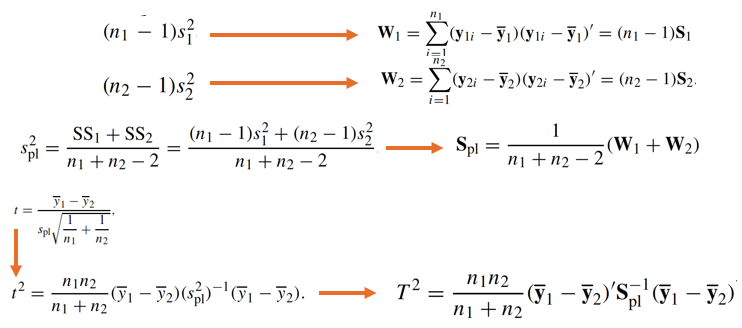

In [28]:
# 3. Menghitung W1
W1 = (len(df1)-1)*cov_matrix1
W1

array([[ 7.301000e+03,  3.940000e+02,  1.545000e+03,  5.055000e+02,
        -3.025000e+02,  1.575000e+03],
       [ 3.940000e+02,  1.295800e+03,  1.816000e+02,  5.105000e+02,
        -1.217300e+03,  1.274000e+02],
       [ 1.545000e+03,  1.816000e+02,  2.301200e+03, -7.180000e+02,
         4.000000e-01, -7.720000e+01],
       [ 5.055000e+02,  5.105000e+02, -7.180000e+02,  1.900375e+04,
        -4.627500e+02, -1.645000e+02],
       [-3.025000e+02, -1.217300e+03,  4.000000e-01, -4.627500e+02,
         6.126550e+03, -2.511900e+03],
       [ 1.575000e+03,  1.274000e+02, -7.720000e+01, -1.645000e+02,
        -2.511900e+03,  8.934200e+03]])

In [29]:
# 4. Menghitung W2
W2 = (len(df2)-1)*cov_matrix2
W2

array([[13068.2 ,  1316.8 ,  -991.4 ,  1462.4 ,   -27.5 ,  8344.8 ],
       [ 1316.8 ,   982.2 ,    63.4 ,  -892.4 ,  -671.5 ,  1073.2 ],
       [ -991.4 ,    63.4 ,  2106.8 ,   833.2 ,  -151.  , -2125.6 ],
       [ 1462.4 ,  -892.4 ,   833.2 , 15058.8 ,   155.  ,  2465.6 ],
       [  -27.5 ,  -671.5 ,  -151.  ,   155.  ,  3299.75,  2208.  ],
       [ 8344.8 ,  1073.2 , -2125.6 ,  2465.6 ,  2208.  , 23821.2 ]])

In [30]:
# 5. Menghitung Spl

Spl = (1/(len(df1)+len(df2)-2))*(W1+W2)
Spl

array([[536.03157895,  45.02105263,  14.56842105,  51.78684211,
         -8.68421053, 261.04736842],
       [ 45.02105263,  59.94736842,   6.44736842, -10.05      ,
        -49.70526316,  31.59473684],
       [ 14.56842105,   6.44736842, 116.        ,   3.03157895,
         -3.96315789, -57.96842105],
       [ 51.78684211, -10.05      ,   3.03157895, 896.38289474,
         -8.09868421,  60.55526316],
       [ -8.68421053, -49.70526316,  -3.96315789,  -8.09868421,
        248.06052632,  -7.99736842],
       [261.04736842,  31.59473684, -57.96842105,  60.55526316,
         -7.99736842, 861.98421053]])

In [31]:
# 6. Menghitung invers Spl
Inverse_Spl = np.linalg.inv(Spl)
Inverse_Spl

array([[ 2.35494115e-03, -1.58876123e-03, -5.57361115e-04,
        -1.07989698e-04, -2.70496463e-04, -6.87353606e-04],
       [-1.58876123e-03,  2.18229895e-02, -1.06641168e-03,
         4.04529130e-04,  4.30112499e-03, -3.78970468e-04],
       [-5.57361115e-04, -1.06641168e-03,  9.16350210e-03,
        -6.72638432e-05, -6.22865805e-05,  8.28274392e-04],
       [-1.07989698e-04,  4.04529130e-04, -6.72638432e-05,
         1.13200054e-03,  1.11060016e-04, -6.51405743e-05],
       [-2.70496463e-04,  4.30112499e-03, -6.22865805e-05,
         1.11060016e-04,  4.88490854e-03, -4.24022061e-05],
       [-6.87353606e-04, -3.78970468e-04,  8.28274392e-04,
        -6.51405743e-05, -4.24022061e-05,  1.44205029e-03]])

In [32]:
n = ((len(df1)*len(df2))/(len(df1)+len(df2)))

In [33]:
a = np.dot(n,Transpose_mean_vector_difference)
a

array([[ -48. ,   64. , -112. , -438.5,   94. , -299. ]])

In [34]:
b = np.dot(a,Inverse_Spl)
b

array([[ 0.07515209,  1.93260187, -1.29182304, -0.42785864,  0.71839177,
        -0.49062257]])

In [35]:
# 7. Menghitung nilai T_square
T_square = np.dot(b,mean_vector_difference)
T_square

array([[66.66043899]])

In [36]:
# 8. Menghitung Parameter dari notasi T^2_{0.01, 6, 38}

from scipy.stats import f

alpha = 0.01  # Tingkat signifikansi
p = 6         # Jumlah variabel
dv1 = p       # Derajat kebebasan pertama (p)
dv2 = 38      # Derajat kebebasan kedua (n - p)

# Ambil nilai kritis F dari distribusi F
F_critical = f.ppf(1 - alpha, dv1, dv2)

# Konversi ke nilai T^2
T2_critical = (p * dv2) / (dv2 - p) * F_critical

print("Nilai kritis T^2:", T2_critical)

Nilai kritis T^2: 23.648823742673876


In [37]:
# 9. Membandingkan T_square dengan T2_critical
if T_square >= T2_critical:
    print("H0 ditolak, maka ada perbedaan vektor rata-rata kelompok engginer dengan kelompok pilot")
else:
    print("H0 diterima, tidak ada perbedaan vektor rata-rata kelompok engginer dengan kelompok pilot ")

H0 ditolak, maka ada perbedaan vektor rata-rata kelompok engginer dengan kelompok pilot
